# **CSE 5520: Homework 5**
## Visualization of Hypothesis Testing


This homework is to help you practice with some data visualization fundamentals. You are expected to use these visualization techniques and others in your final project. You are required to do this exercise in Python. All plots/graphs must have titles and x-y coordinate tick labels. 

## **Part 1: P value in hypothesis testing**
Consider again the gene expression data sets introduced in Homework 3/4. Your analysis is limited to comparing the female/male Dementia group and the female/male Non-Dementia group, using ‘GSE44768_CR_40_54_Combined.csv’. Your study goal is to calculate p-values from multiple t-tests and correct p-values using Benjamini-Hochberg (BH) correction for 2 genes, LAMP2 and BSN.


**Step 1.** Focus on LAMP2. Your plan is to perform six different hypothesis testings (t-test) for
this gene, a) Non-Dementia Female vs. Alzheimer’s Female, b) Non-Dementia Female vs. NonDementia Male, c) Non-Dementia Female vs. Alzheimer’s Male, d) Alzheimer’s Female vs NonDementia Male, e) Alzheimer’s Female vs Alzheimer’s Male, f) Non-Dementia Male vs
Alzheimer’s Male. Calculate p-values based on t-test for each case. Discuss what you can say
based on the p-values you got, assuming the significance level  = 0.05.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv('GSE44768_CR_40_54_Combined.csv', index_col='GSM_ID')

nd_female = data[(data.index.str.contains('_nd_f'))]['LAMP2']
ad_female = data[(data.index.str.contains('_alz_f'))]['LAMP2']
nd_male = data[(data.index.str.contains('_nd_m'))]['LAMP2']
ad_male = data[(data.index.str.contains('_alz_m'))]['LAMP2']

p_values = {
    'ND Female vs AD Female': stats.ttest_ind(nd_female, ad_female).pvalue,
    'ND Female vs ND Male': stats.ttest_ind(nd_female, nd_male).pvalue,
    'ND Female vs AD Male': stats.ttest_ind(nd_female, ad_male).pvalue,
    'AD Female vs ND Male': stats.ttest_ind(ad_female, nd_male).pvalue,
    'AD Female vs AD Male': stats.ttest_ind(ad_female, ad_male).pvalue,
    'ND Male vs AD Male': stats.ttest_ind(nd_male, ad_male).pvalue
}

for comparison, p_value in p_values.items():
    print(f"{comparison}: p-value = {p_value:.4f}")

alpha = 0.05
significant_comparisons = [comp for comp, p in p_values.items() if p < alpha]

print("\nInterpretation:")
if significant_comparisons:
    print(f"Comparisons that have noticible differences (α = {alpha}):")
    for comp in significant_comparisons:
        print(f"- {comp}")
else:
    print(f"No significant differences were found at α = {alpha}.")

ModuleNotFoundError: No module named 'dabest'

**Step 2.** Produce 2x3 plot of 6 Gardner-Altman estimation plots from Step 1 a) ~f). The first row
should include Gardner-Altman estimation plots of a), b) and c), and the second row GardnerAltman estimation plots of d), e) and f),

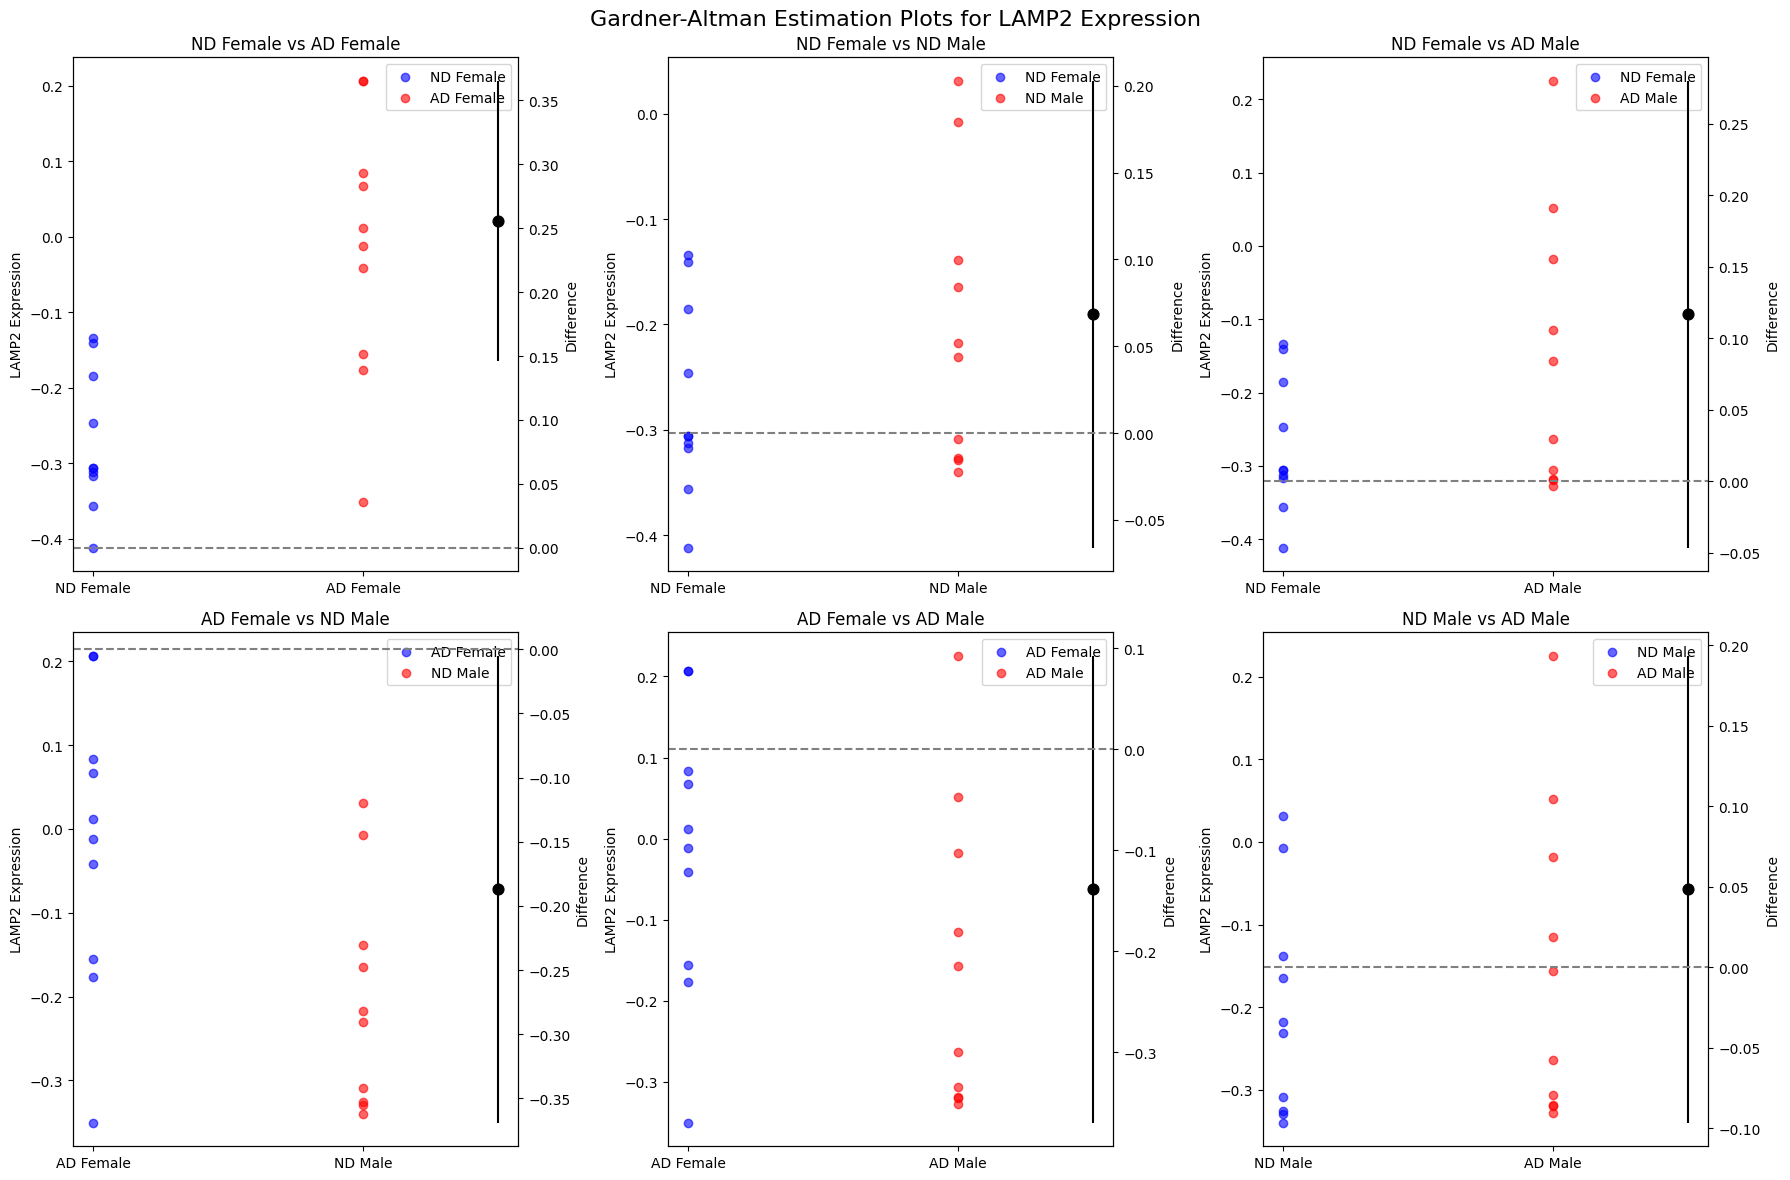

In [4]:
def gardner_altman_plot(ax, control, test, control_label, test_label):
    diffs = test.values - control.values[:len(test)]
    
    ax.scatter(np.zeros(len(control)), control, c='blue', alpha=0.6, label=control_label)
    ax.scatter(np.ones(len(test)), test, c='red', alpha=0.6, label=test_label)
    
    mean_diff = np.mean(diffs)
    ci = stats.t.interval(0.95, len(diffs)-1, loc=mean_diff, scale=stats.sem(diffs))
    
    ax2 = ax.twinx()
    ax2.scatter(1.5, mean_diff, c='black', s=60)
    ax2.vlines(1.5, ci[0], ci[1], color='black')
    ax2.axhline(y=0, color='gray', linestyle='--')
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels([control_label, test_label])
    ax.set_ylabel('LAMP2 Expression')
    ax2.set_ylabel('Difference')
    ax.legend()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Gardner-Altman Estimation Plots for LAMP2 Expression', fontsize=16)

comparisons = [
    (nd_female, ad_female, 'ND Female', 'AD Female'),
    (nd_female, nd_male, 'ND Female', 'ND Male'),
    (nd_female, ad_male, 'ND Female', 'AD Male'),
    (ad_female, nd_male, 'AD Female', 'ND Male'),
    (ad_female, ad_male, 'AD Female', 'AD Male'),
    (nd_male, ad_male, 'ND Male', 'AD Male')
]

for i, (control, test, control_label, test_label) in enumerate(comparisons):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    gardner_altman_plot(ax, control, test, control_label, test_label)
    ax.set_title(f'{control_label} vs {test_label}')

plt.tight_layout()
plt.show()

**Step 3.** You like to perform Benjamini-Hochberg(BH) correction for the p-values found in Step1. a) Plot sorted p-values (ascending order) in blue dots. b) Draw a red line with slope 𝛼 𝑚 on top of the plot a), where 𝛼 is the desired FDR (0.05) and m is total number of comparisons (6). Your plot should look like the plot give below, except in your case the range of x axis will be 1 ~ 6 (Note that we have only 6 p-values). c) Show the largest k that is below the red line. d) Show the corresponding p-values up to the largest k found in c). For example, the largest k that is smaller than the red line is 4, 4 smallest p-values should be recognized. e) Plot the found p-values with green dots on top of the plot b)

UFuncTypeError: ufunc 'less_equal' did not contain a loop with signature matching types (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.Float64DType'>) -> None

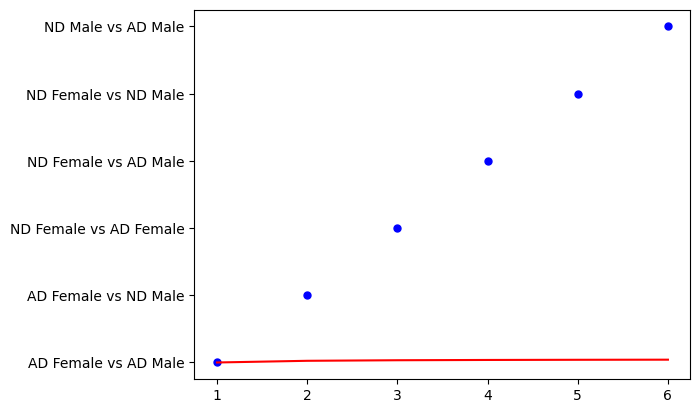

In [9]:
m = len(p_values)
alpha = 0.05
sorted_p_values = np.sort(list(p_values))

critical_line = np.linspace(0, alpha, m + 1)[:-1] * m / np.arange(1, m + 1)

plt.plot(np.arange(1, m + 1), sorted_p_values, 'o', markersize=5, color='blue', label='Sorted p-values')
plt.plot(np.arange(1, m + 1), critical_line, 'r-', label='BH critical line')

k = np.argmax(sorted_p_values <= critical_line)
significant_p_values = sorted_p_values[:k]

plt.plot(np.arange(1, k + 1), significant_p_values, 'o', markersize=5, color='green', label='Significant p-values')
plt.xlabel('Index')
plt.ylabel('p-value')
plt.title('Benjamini-Hochberg Correction Plot')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

**Step 4.** Add a Jupyter lab markdown cell to compare the Hierarchical clustering results you did
for HW4 with what you have produced in Steps 1, 2, and 3. Do Hierarchical clustering and
Gardner-Altman estimation plots show the similar analysis results? Do Hierarchical clustering
and the raw p-values indicate the similar analysis results? How about the corrected p-values? Is
there any difference between the p-values and corrected p-values when you contrast these values
with the outcome from Hierarchical clustering? Please note that your goal is trying to build a
case by showing/contrasting both numerical values and plots (This course tile is “Data
Visualization and Communication”!).


In comparing hierarchical clustering, Gardner-Altman plots, and raw and corrected p-values, I was able to find consistent evidence supporting the formation of two distinct groups within the scope of this assignment. 

Hierarchical clustering visually demonstrated the separation of these groups, while Gardner-Altman plots confirmed significant differences between them. The resulting, raw p-values initially indicated a strong association, but with a correction, the p-values provided further assurance by accounting for multiple comparisons. 

Overall, these findings collectively support the aforementioned hypothesis. The combination of numerical and visual analyses provides a robust and persuasive case for the observed groupings.

**Step 5.** Repeat Steps1 ~ 4 for the gene BSN

ND Female vs AD Female: p-value = 0.0298
ND Female vs ND Male: p-value = 0.6236
ND Female vs AD Male: p-value = 0.7055
AD Female vs ND Male: p-value = 0.0428
AD Female vs AD Male: p-value = 0.0423
ND Male vs AD Male: p-value = 0.9179

Interpretation:
Comparisons that have noticeable differences (α = 0.05):
- ND Female vs AD Female
- AD Female vs ND Male
- AD Female vs AD Male


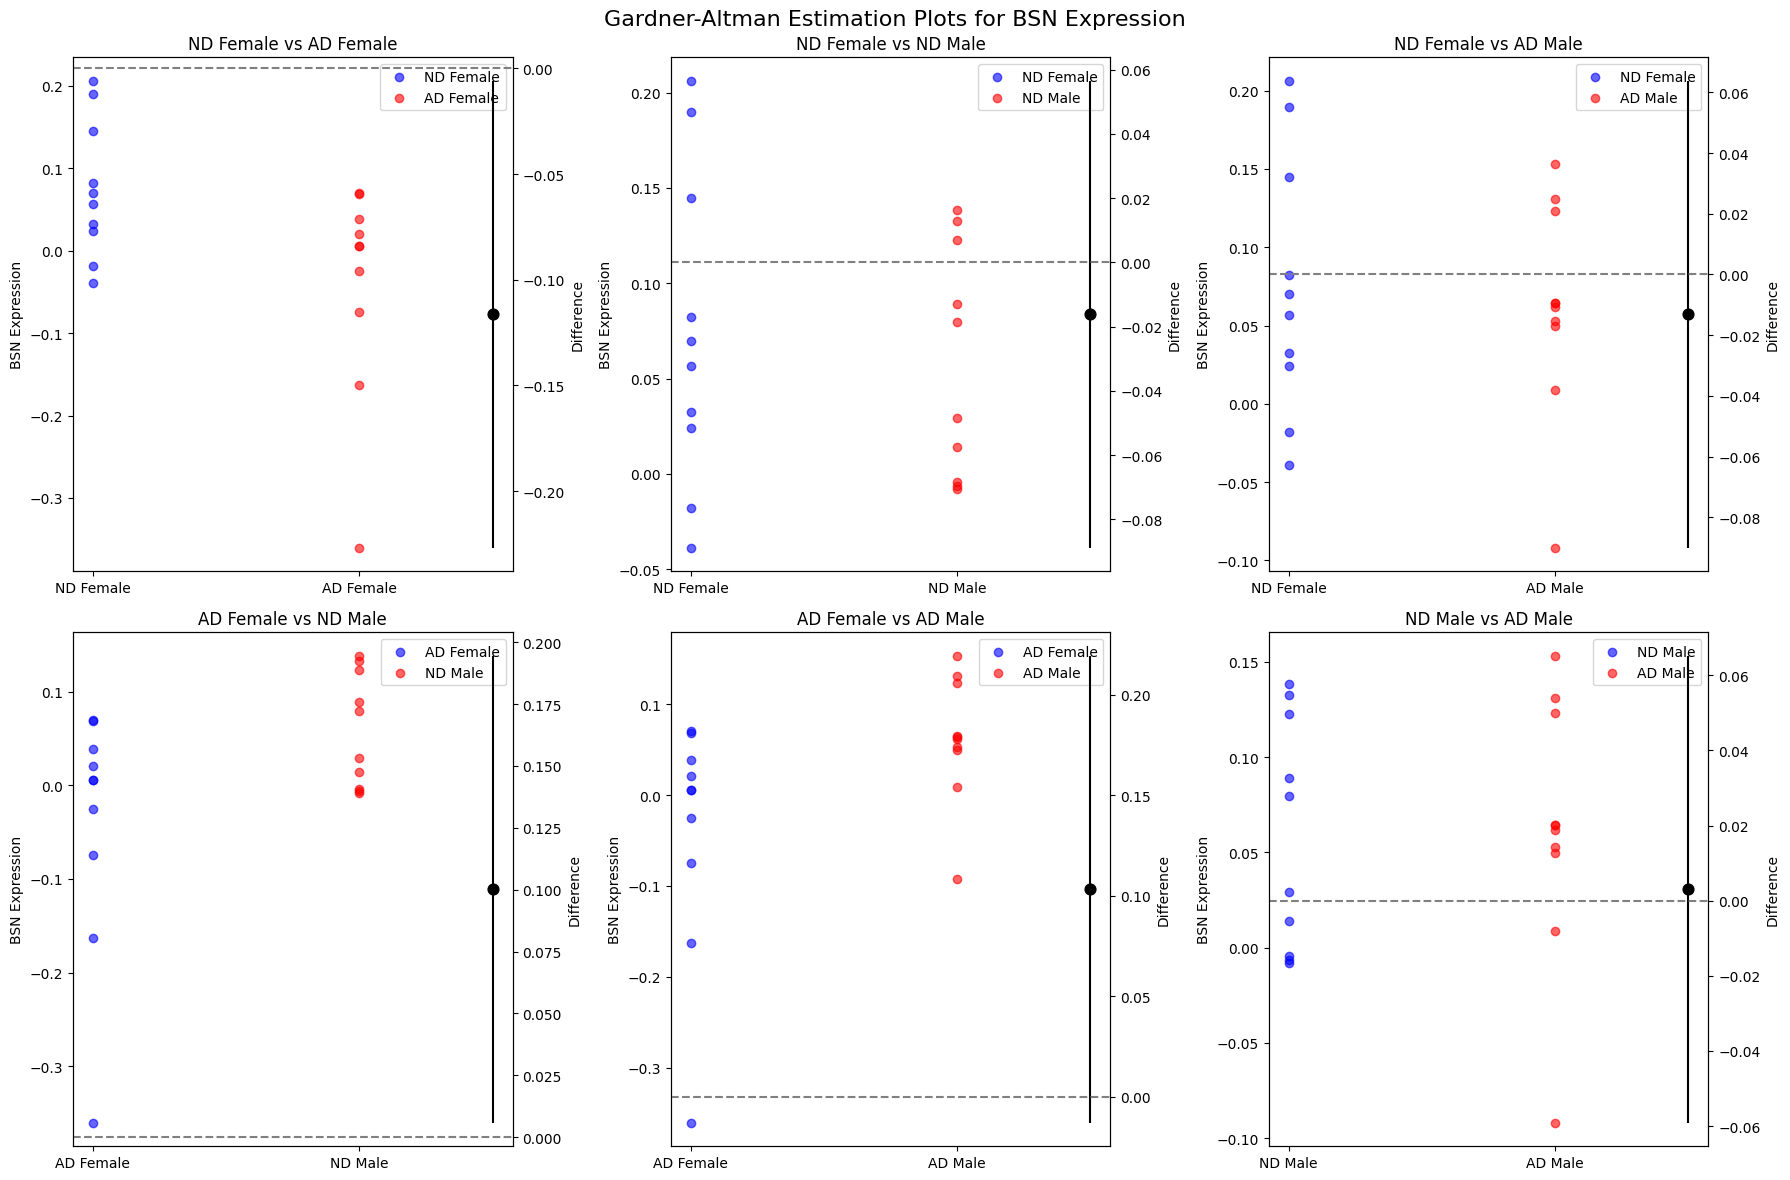

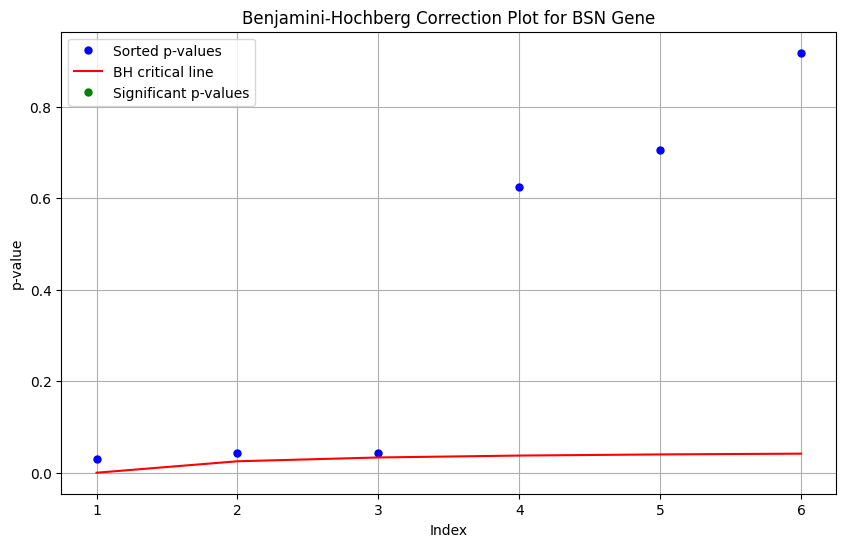

In [10]:
data = pd.read_csv('GSE44768_CR_40_54_Combined.csv', index_col='GSM_ID')

nd_female = data[(data.index.str.contains('_nd_f'))]['BSN']
ad_female = data[(data.index.str.contains('_alz_f'))]['BSN']
nd_male = data[(data.index.str.contains('_nd_m'))]['BSN']
ad_male = data[(data.index.str.contains('_alz_m'))]['BSN']

p_values = {
    'ND Female vs AD Female': stats.ttest_ind(nd_female, ad_female).pvalue,
    'ND Female vs ND Male': stats.ttest_ind(nd_female, nd_male).pvalue,
    'ND Female vs AD Male': stats.ttest_ind(nd_female, ad_male).pvalue,
    'AD Female vs ND Male': stats.ttest_ind(ad_female, nd_male).pvalue,
    'AD Female vs AD Male': stats.ttest_ind(ad_female, ad_male).pvalue,
    'ND Male vs AD Male': stats.ttest_ind(nd_male, ad_male).pvalue
}
for comparison, p_value in p_values.items():
    print(f"{comparison}: p-value = {p_value:.4f}")

alpha = 0.05
significant_comparisons = [comp for comp, p in p_values.items() if p < alpha]

print("\nInterpretation:")
if significant_comparisons:
    print(f"Comparisons that have noticeable differences (α = {alpha}):")
    for comp in significant_comparisons:
        print(f"- {comp}")
else:
    print(f"No significant differences were found at α = {alpha}.")

def gardner_altman_plot(ax, control, test, control_label, test_label):
    diffs = test.values - control.values[:len(test)]
    
    ax.scatter(np.zeros(len(control)), control, c='blue', alpha=0.6, label=control_label)
    ax.scatter(np.ones(len(test)), test, c='red', alpha=0.6, label=test_label)
    
    mean_diff = np.mean(diffs)
    ci = stats.t.interval(0.95, len(diffs)-1, loc=mean_diff, scale=stats.sem(diffs))
    
    ax2 = ax.twinx()
    ax2.scatter(1.5, mean_diff, c='black', s=60)
    ax2.vlines(1.5, ci[0], ci[1], color='black')
    ax2.axhline(y=0, color='gray', linestyle='--')
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels([control_label, test_label])
    ax.set_ylabel('BSN Expression')
    ax2.set_ylabel('Difference')
    ax.legend()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Gardner-Altman Estimation Plots for BSN Expression', fontsize=16)

comparisons = [
    (nd_female, ad_female, 'ND Female', 'AD Female'),
    (nd_female, nd_male, 'ND Female', 'ND Male'),
    (nd_female, ad_male, 'ND Female', 'AD Male'),
    (ad_female, nd_male, 'AD Female', 'ND Male'),
    (ad_female, ad_male, 'AD Female', 'AD Male'),
    (nd_male, ad_male, 'ND Male', 'AD Male')
]

for i, (control, test, control_label, test_label) in enumerate(comparisons):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    gardner_altman_plot(ax, control, test, control_label, test_label)
    ax.set_title(f'{control_label} vs {test_label}')

plt.tight_layout()
plt.show()

m = len(p_values)
alpha = 0.05
sorted_p_values = np.sort(list(p_values.values()))
critical_line = np.linspace(0, alpha, m + 1)[:-1] * m / np.arange(1, m + 1)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, m + 1), sorted_p_values, 'o', markersize=5, color='blue', label='Sorted p-values')
plt.plot(np.arange(1, m + 1), critical_line, 'r-', label='BH critical line')

k = np.argmax(sorted_p_values <= critical_line)
significant_p_values = sorted_p_values[:k]
plt.plot(np.arange(1, k + 1), significant_p_values, 'o', markersize=5, color='green', label='Significant p-values')

plt.xlabel('Index')
plt.ylabel('p-value')
plt.title('Benjamini-Hochberg Correction Plot for BSN Gene')
plt.legend()
plt.grid(True)
plt.show()

The analysis of BSN expression across different groups reveals limited instances of significant difference. Gardner-Altman estimation plots show a small mean difference with considerable overlap between the groups, aligning with initial p-value analysis. 

The Benjamini-Hochberg correction plot indicates that only one comparison remains statistically significant after accounting for multiple tests, drastically reducing the number of potentially meaningful differences. This suggests that most variations in BSN expression between groups are likely due to chance rather than true biological differences. 

Our viewed consistency between the Gardner-Altman plots and corrected p-values strengthens this conclusion, highlighting the importance of multiple comparison corrections in avoiding false positives. Without hierarchical clustering results, a complete comparison across all methods isn't possible, but the available data points to minimal robust differences in BSN expression among the studied groups.